In [1]:
from numpy.linalg import svd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

### 習題 1：奇異值選取與圖像處理

#### 匯入圖像資料，將圖像轉為黑白的並且直接進行奇異值分解（SVD），選取不同的奇異值（Singular Value）個數（q）繪圖。

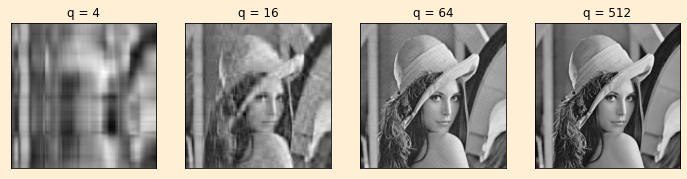

In [2]:
imgfile = "Lenna.png" 
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) 
N, p = X.shape
U, E, VT = svd(X, full_matrices = False)
q = np.array([p/128, p/32, p/8, p]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(12, 4), facecolor = "papayawhip")
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('q = {}'.format(r))
    ax[i].set_xticks([])
    ax[i].set_yticks([])


    比較結果
- q = 2時圖像非常模糊，甚至無法看出原圖的樣貌
- q = 16時圖像模糊，但可以看出原圖的樣貌
- q = 64時圖像清楚許多，與q = 512相比解析較差，但卻足夠呈現這張圖像
- q = 512是選取了所有奇異值的呈現結果


### 以下撰寫三個後續會使用到的函數

1. 將圖像以k X k小圖（patch）切割再拉直並重新排列為新的 $k^2$ X Ｎ的矩陣（$X_k$）

In [3]:
def image_to_X(k):
    data_matrix = []
    for i in range(0, N, k):
        for j in range(0, N, k):
            sub_array = X[i:i+k, j:j+k]
            flattened_sub_array = sub_array.flatten() 
            data_matrix.append(flattened_sub_array) 

    data_matrix = np.vstack(data_matrix)
    data_matrix = np.transpose(data_matrix)
    return data_matrix

2. 將矩陣（$X_k$）還原為原始N X N的矩陣（X）

In [4]:
"""
X_k : 拉直後矩陣
k : 選取k X k patch
N : 原矩陣row
"""
def X_to_image(X_k, k, N):
    num_blocks = X_k.shape[1]
    block_size = k * k
    num_rows = N // k
    num_cols = N // k
    restored_image = np.zeros((N, N))

    for i in range(num_blocks):
        col = i % num_rows
        row = i // num_rows
        restored_image[row*k:(row+1)*k, col*k:(col+1)*k] = X_k[:, i].reshape((k, k))

    return restored_image


3. 選取不同的奇異值個數（q），計算出 $X_q$ 再透過函數（X_to_image）還原矩陣，並且繪圖


In [5]:
def show_image(q, k):
    fig, ax = plt.subplots(1, 4, figsize=(12, 4), facecolor = "papayawhip")
    for i, r in enumerate(q):
        Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
        image = X_to_image(Xq, k, N)
        ax[i].imshow(image, cmap = 'gray')
        ax[i].set_title('q = {}'.format(r))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    print(f"patch:{k} X {k}")
    plt.show()

### 不同patch選取結果

    8 X 8 /per patch

將原始矩陣（X）透過函數（image_to_X）切割並且拉直，重新排列為新的矩陣（$X_k$）
- 矩陣$X_k$ 列數為64（8X8 patch）欄位數為4096（小圖個數）
- 將這4096個向量，透過深藍到淺黃將數值視覺化呈現

shap : 64 X 4096


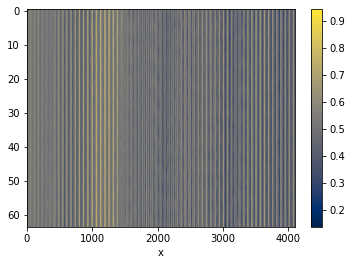

In [6]:
k = 8
X_k = image_to_X(k)
print(f"shap : {X_k.shape[0]} X {X_k.shape[1]}")
plt.imshow(X_k, cmap='cividis', aspect='auto')
plt.colorbar()
plt.xlabel('x')  
plt.show()

選取不同的奇異值個數（q），進行SVD分解後，從選擇的q計算出 $X_q$ ，再還原矩陣並且繪圖
- q = 2 時圖像較為模糊，但能看出原始圖片樣貌
- q = 8 時圖像清晰，在色彩上略有不足
- q = 32 時圖像清晰，且色彩對比較佳，與原圖(q = 512)並無明顯差異 

patch:8 X 8


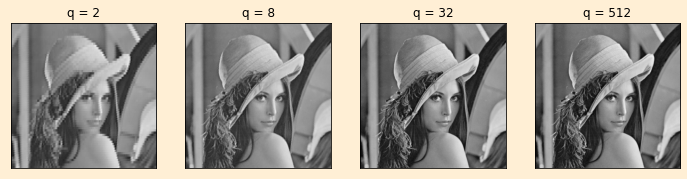

In [7]:
U, E, VT = svd(X_k, full_matrices = False)
q = np.array([p/256, p/64, p/16, p]).astype('int')
show_image(q, k)

    16 X 16/per patch

將原始矩陣（X）透過函數（image_to_X）切割並且拉直，重新排列為新的矩陣（$X_k$）
- 矩陣$X_k$ 列數為256（16X16 patch）欄位數為1024（小圖個數）
- 將這1024個向量，透過深藍到淺黃將數值視覺化呈現

shap : 256 X 1024


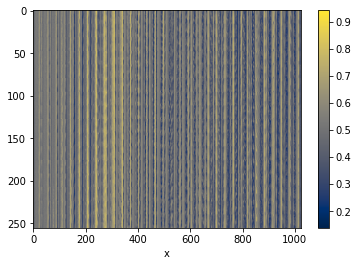

In [8]:
k = 16
X_k = image_to_X(k)
print(f"shap : {X_k.shape[0]} X {X_k.shape[1]}")
plt.imshow(X_k, cmap='cividis', aspect='auto')
plt.colorbar()
plt.xlabel('x')  
plt.show()

選取不同的奇異值個數（q），進行SVD分解後，從選擇的q計算出 $X_q$ ，再還原矩陣並且繪圖
- q = 2 時圖像較為模糊，但能看出原始圖片樣貌
- q = 8 時圖像有些模糊，但能清楚看出圖像樣貌
- q = 32 時圖像清晰，除了色彩對比較差，與原圖(q = 512)並無明顯差異 

patch:16 X 16


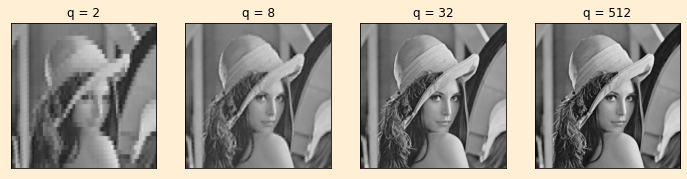

In [9]:
U, E, VT = svd(X_k, full_matrices = False)
q = np.array([p/256, p/64, p/16, p]).astype('int')
show_image(q, k)

    32 X 32/per patch

將原始矩陣（X）透過函數（image_to_X）切割並且拉直，重新排列為新的矩陣（$X_k$）
- 矩陣$X_k$ 列數為1024（32X32 patch）欄位數為256（小圖個數）
- 將這256個向量，透過深藍到淺黃將數值視覺化呈現

shap : 1024 X 256


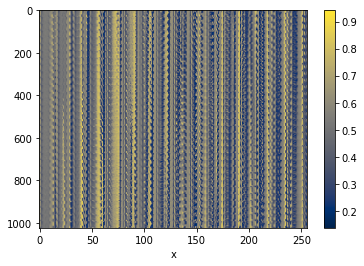

In [10]:
k = 32
X_k = image_to_X(k)
print(f"shap : {X_k.shape[0]} X {X_k.shape[1]}")
plt.imshow(X_k, cmap='cividis', aspect='auto')
plt.colorbar()
plt.xlabel('x')  
plt.show()

選取不同的奇異值個數（q），進行SVD分解後，從選擇的q計算出 $X_q$ ，再還原矩陣並且繪圖
- q = 2 時圖像模糊，幾乎無法看不出原始圖像樣貌
- q = 16 時圖像有些模糊，但能清楚看出圖像樣貌
- q = 64 時圖像較清晰，色彩對比較差，與原圖(q = 512)較無差異 

patch:32 X 32


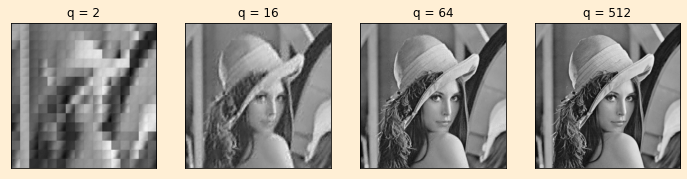

In [11]:
U, E, VT = svd(X_k, full_matrices = False)
q = np.array([p/256, p/32, p/8, p]).astype('int')
show_image(q, k)

#### 小結
- X不變下，q = 64有很好的圖片呈現結果
- X以8 X 8進行切割，q = 8有很好的圖片呈現結果
- X以16 X 16進行切割，q = 32有很好的圖片呈現結果
- X以32 X 32進行切割，q = 64有很好的圖片呈現結果

#### 切割前後比較

     切割前

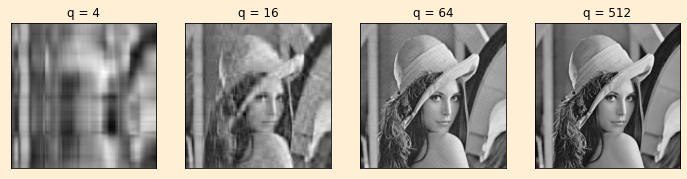

In [12]:
q = np.array([p/128, p/32, p/8, p]).astype('int')
U, E, VT = svd(X, full_matrices = False)
fig, ax = plt.subplots(1, 4, figsize=(12, 4), facecolor = "papayawhip")
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('q = {}'.format(r))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    切割後

patch:8 X 8


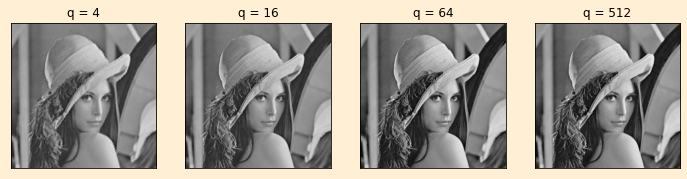

patch:16 X 16


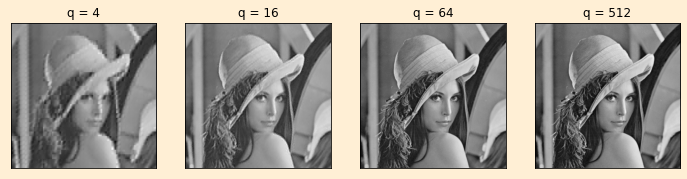

patch:32 X 32


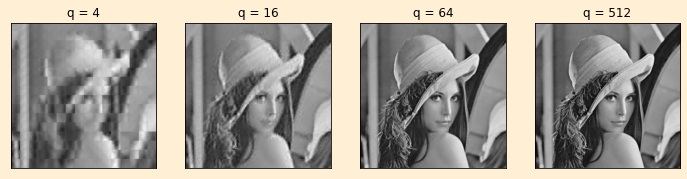

In [13]:
k = 8
X_k = image_to_X(k)
U, E, VT = svd(X_k, full_matrices = False)
show_image(q, k)

k = 16
X_k = image_to_X(k)
U, E, VT = svd(X_k, full_matrices = False)
show_image(q, k)

k = 32
X_k = image_to_X(k)
U, E, VT = svd(X_k, full_matrices = False)
show_image(q, k)

#### 小結
- 有透過切割再重組安排明顯圖像品質比較好
- 相同壓縮比例（q一樣）的情況下，切割小圖選擇越小，最後還原後的品質越好
<hr>

#### 特殊切割方法
- 切割方式：512*512的矩陣（X），將它座標化來說明切割方式，每個小圖取座標(1,1),...,(2,1),(2,2),...,(3,3)九個像素值為第一個小圖拉直，第二個小圖選(1,2),...,(2,2),(2,3),...,(3,4)，以此類推，將所有小圖拉直擺進新的矩陣（$X_k$）


In [14]:
def extract_patch(matrix, patch_size):
    x_df = []
    for i in range(p - patch_size + 1):
        for j in range(p - patch_size + 1):
            x = matrix[i:i+patch_size, j:j+patch_size].flatten()
            x_df.append(x)
    return np.array(x_df)
N, p = X.shape
k = 3  
X_k = extract_patch(X, k).T

- Ｘ被切割成260100個小圖

shap : 9 X 260100


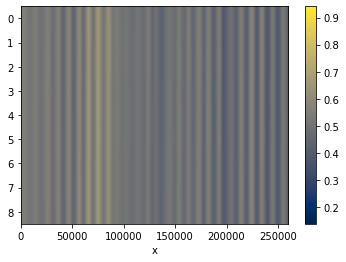

In [15]:
print(f"shap : {X_k.shape[0]} X {X_k.shape[1]}")
plt.imshow(X_k, cmap='cividis', aspect='auto')
plt.colorbar()
plt.xlabel('x')  
plt.show()

- 進行SVD分解後，從選擇的q計算出 $X_q$ ，再還原矩陣並且繪圖

patch:3 X 3


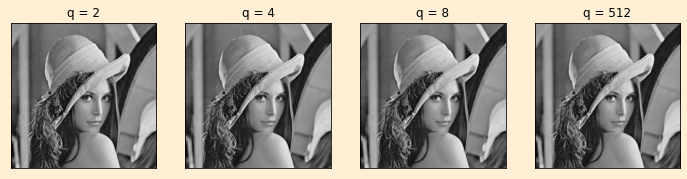

In [16]:
U, E, VT = svd(X_k, full_matrices = False)

# 拼回去
X = np.zeros((N, N))  
for i, patch_value in enumerate(X_k.T):
    row = i // (N - k + 1)  
    col = i % (N - k + 1)  
    X[row:row+k, col:col+k] = patch_value.reshape((k, k))

# 選擇q並繪圖
q = np.array([p/256, p/128, p/64, p]).astype('int')
fig, ax = plt.subplots(1, 4, figsize=(12, 4), facecolor = "papayawhip")
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
    ax[i].imshow(X, cmap = 'gray')
    ax[i].set_title('q = {}'.format(r))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
print(f"patch:{k} X {k}")
plt.show()

#### 結論：這個切割方式還原後的圖像品質非常好，用肉眼看當q = 2時效果就和原圖一樣好，但是這樣的方式會是用到非常多的小圖進行分析，或許在實務上沒有這個必要。
<hr>

### 習題 2：處理手寫數字識別資料集

##### 讀取"mnist_784"手寫數字識別資料集
- 70,000 張 28x28 像素的灰度圖像（X）
- 10 個類別（y），分別代表了數字 0 到 9
- 像素值介於 0 到 255 

In [17]:
X, y = fetch_openml('mnist_784', return_X_y = True)
X = X.T

##### 函數(montage)將相應數字的圖像資料，加入指定的行列數，整理成Montage矩陣（M）

In [18]:
def montage(A, m, n): 
    sz = np.sqrt(A.shape[0]).astype('int') 
    M = np.zeros((m*sz, n*sz)) 
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = A[:, i*n+j].reshape(sz, sz)
    return M

##### Montage矩陣（M）中所有數值（0-9）分別選取50個繪圖

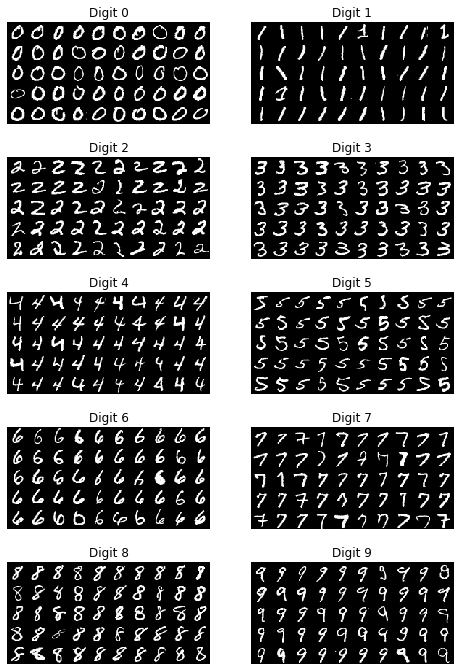

In [19]:
digit = list(range(0, 10)) # 包含0 - 9的list
fig, ax = plt.subplots(5, 2 , figsize=(8, 12))
m, n = 5, 10 

for i in range(len(digit)):    
    idx = y[y==str(digit[i])].index # 取得數字索引
    Digit = X.iloc[:, idx] # 從 X 資料集中取得相應索引的圖像資料
    M = montage(np.array(Digit), m, n)
    ax[i//2, i%2].imshow(M, cmap='gray', interpolation='nearest')
    ax[i//2, i%2].set_title('Digit {}'.format(i))
    ax[i//2, i%2].axis('off')

plt.show()


##### 70000張手寫圖像，每個數字約7000張，進行抽樣
- np.random.choice(idx, replace = False, size = m * n)
- 取後不放回的隨機抽樣
- 抽樣50張圖像

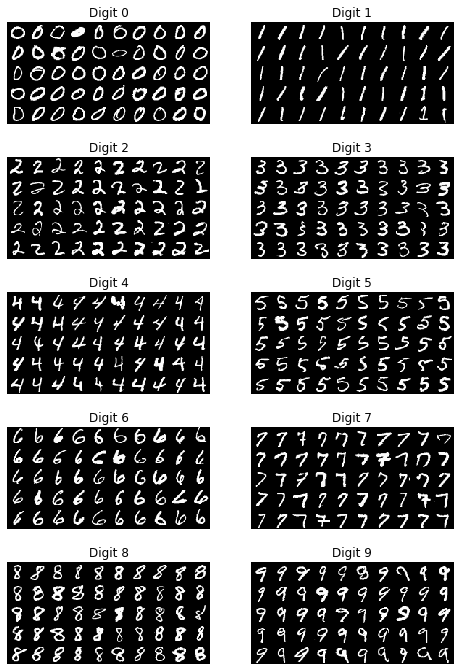

In [20]:
digit = list(range(0, 10))  
fig, ax = plt.subplots(5, 2 , figsize=(8, 12)) 
m, n = 5, 10  

for i in range(len(digit)):    
    idx = y[y==str(digit[i])].index 
    idx_to_show = np.random.choice(idx, replace=False, size = m * n) 
    Digit = X.iloc[:, idx_to_show]  
    M = montage(np.array(Digit), m, n)  
    ax[i//2, i%2].imshow(M, cmap='gray', interpolation='nearest') 
    ax[i//2, i%2].set_title('Digit {}'.format(i)) 
    ax[i//2, i%2].axis('off') 

plt.show()


### 習題3 : 對矩陣做 Rank q approximation並計算壓縮倍數與解釋變量

函數（q_approximation）繪製壓縮前後的圖像與其資訊
- 壓縮比（Compression ratio） = 原始資料大小 / 壓縮後資料大小
- 解釋變量（Explained variance）= 奇異值的平方（$E^2$）/ 總奇異值的平方和（$\Sigma E^2$）

In [21]:
def q_approximation(q, p):
    q = np.array([p, q])
    for i, r in enumerate(q):
        idx = np.random.choice(np.arange(X.shape[1]), size = 100, replace = False)
        Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
        df = pd.DataFrame(Xq)
        show = df.iloc[:, idx] 
        ax[i].imshow(montage(np.array(show), m, n), cmap ='gray')
        ax[i].set_title('Compression ratio = {:.2f}\n Explained variance = {:.2f}%'.format(784 * m * n/(r * 784 + r * m * n),100 * sum(E[:r]**2)/sum(E**2)))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

##### 將原矩陣做SVD分解

In [22]:
U, E, VT = svd(X, full_matrices = False ) 
N, p = X.shape

##### 將壓縮後的矩陣（$X_q$）取出100張與原圖比較

    q = 30
- 壓縮比 = 2.96，數據的存儲空間被減少約2.96倍
- 解釋變量 = 83.90 %，30個奇異值能夠解釋資料中的83.90%的變異性

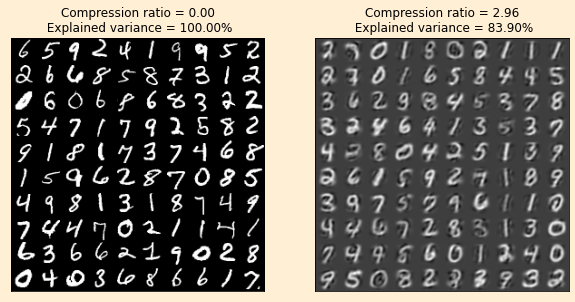

In [23]:
m, n = 10, 10 
fig, ax = plt.subplots(1, 2 , figsize=(10, 5), facecolor = "papayawhip")
q_approximation(q = 30, p = p)

    q = 60
- 壓縮比 = 1.48，數據的存儲空間被減少約1.48倍
- 解釋變量 = 91.20 %，60個奇異值能夠解釋資料中的91.20%的變異性

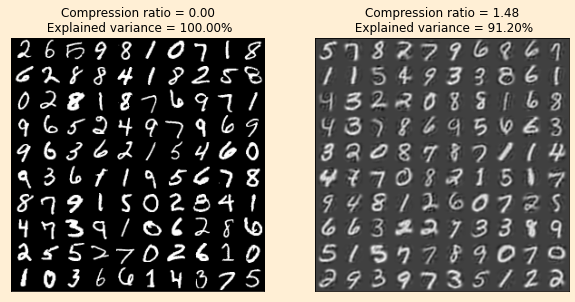

In [24]:
fig, ax = plt.subplots(1, 2 , figsize=(10, 5), facecolor = "papayawhip")
q_approximation(q = 60, p = p)

### 習題4：影像圖的加密與解密

##### 透過人臉資料建構Ｕ

In [25]:
from numpy.linalg import svd
import scipy.io

D = scipy.io.loadmat('allFaces.mat')
X = D['faces'] 
avgFace = X.mean(axis = 1).reshape(-1, 1)
X_avg = X - np.tile(avgFace, (1, X.shape[1]))
U, E, VT = svd(X_avg, full_matrices = False )

##### 解密

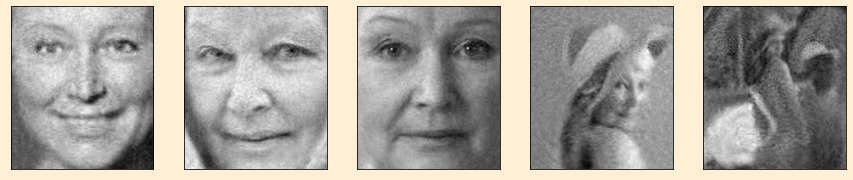

In [26]:
Z = pd.read_csv('五張加密的影像.csv')
X_q = np.array(U[:,0:2000] @ Z)
fig, ax = plt.subplots(1, 5 , figsize=(15, 3), facecolor = "papayawhip", sharey = True)
for i in range(5):
    ax[i].imshow(X_q[:,i].reshape(168, 192).T, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

##### 網路上找的五張圖

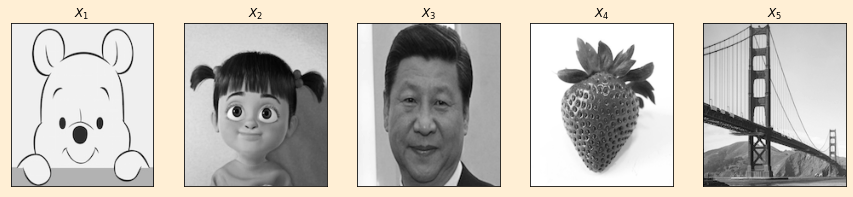

In [27]:
X1 = np.mean(mpimg.imread("pic/img1.png"), axis=2)
X2 = np.mean(mpimg.imread("pic/img2.png"), axis=2)
X3 = np.mean(mpimg.imread("pic/img3.png"), axis=2)
X4 = np.mean(mpimg.imread("pic/img4.png"), axis=2)
X5 = np.mean(mpimg.imread("pic/img5.png"), axis=2)

X = list((X1,X2,X3,X4,X5))
fig, ax = plt.subplots(1, 5 , figsize=(15, 3), facecolor = "papayawhip", sharey = True)
for i in range(len(X)):  
    ax[i].imshow(X[i], cmap='gray')
    ax[i].set_title('$X_%d$' % (i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

#### 先把程式碼整理成函數（pic_to_pic），以利後面呈現實驗結果

In [28]:
def pic_to_pic(Xa, Xb):

    def plot(q, X):
        fig, ax = plt.subplots(1, 3 , figsize=(12, 4),facecolor = "papayawhip")
        for i, r in enumerate(q):
            Xq = U[:, :r] @ (U[:, :r].T @ np.array(X)) 
            ax[i].imshow(Xq, cmap ='gray')
            ax[i].set_title('q={}'.format(r))
            ax[i].set_xticks([])
            ax[i].set_yticks([])

    # step1 取得U加密並繪圖
    U, E, VT = svd(Xa, full_matrices = False)
    q = np.array([5, 15, 45])
    plot(q, Xa)

    # step2 透過特徵U解密並繪圖 
    plot(q, Xb)

#### 實驗一
    影像選取
- 加密影像：線條簡單的圖（$X_1$）
- 解密影像：人臉（$X_3$）

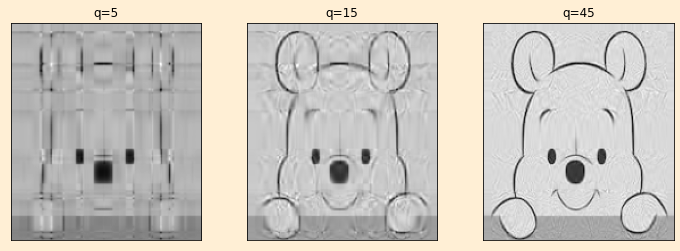

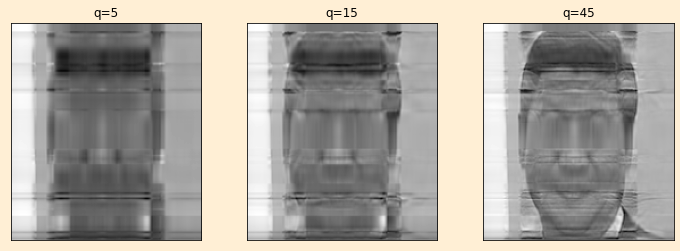

In [29]:
pic_to_pic(X1, X3)

     解密結果
- $X_1$的特徵U解密後呈現的影像都不太清楚。
- 解密後原圖影像不清楚。
- 解密後影像部分重要特徵不存在，像是人臉的眼睛。
<hr>

#### 實驗二
    影像選取
- 加密影像：卡通人物（$X_2$）
- 解密影像：草莓（$X_4$）

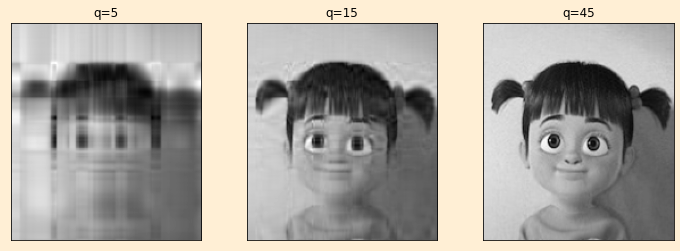

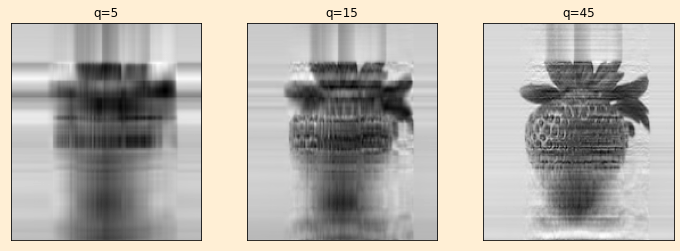

In [30]:
pic_to_pic(X2, X4)

     解密結果
- $X_2$的特徵U解密後呈現的影像都只有部分清楚，大致上看得出來是草莓。
- 換成其他照片，解密後的影像都是上半部清楚，可能與加密影像（卡通人物的瀏海）特徵位置有關。
<hr>

#### 實驗三
    影像選取
- 加密影像：人臉（$X_3$）
- 解密影像：卡通人物（$X_2$）


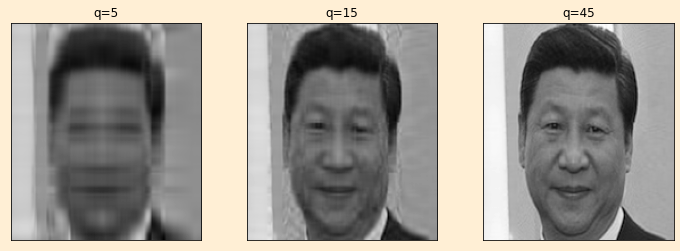

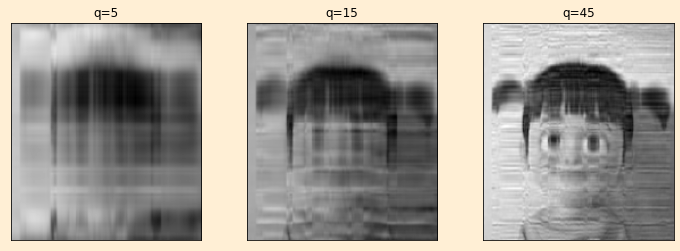

In [31]:
pic_to_pic(X3, X2)

     解密結果
- 利用人臉（$X_3$）的特徵U解密後呈現的影像都較完整且清楚。
- 解密後的影像圖以中心較為清楚（人臉處）。
- 加密後的影像隱約存在原圖的模樣，像是原圖人臉的雙下巴。
<hr>

#### 實驗四
    影像選取
- 加密影像：草莓（$X_4$）
- 解密影像：風景照（$X_5$）


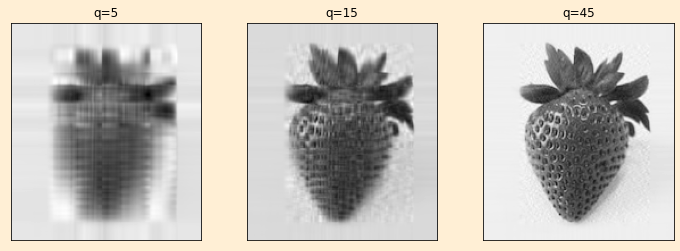

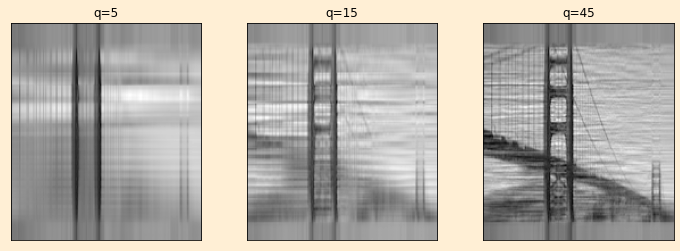

In [32]:
pic_to_pic(X4, X5)

     解密結果
- 利用水果（$X_4$）的特徵U解密後呈現的影像都很完整且清晰。
- 解密後的影像不論是人臉、卡通圖或是風景影像都很清楚，其中以原草莓的位置影像特別清晰。
<hr>

#### 實驗五
    影像選取
- 加密影像：風景照（$X_5$）
- 解密影像：人物（$X_3$）


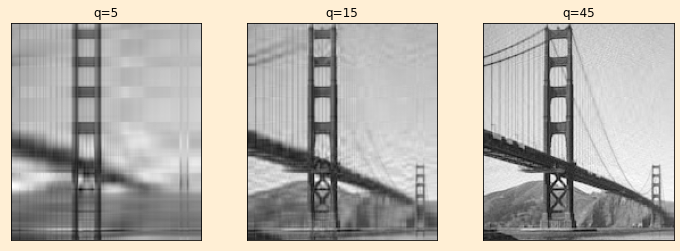

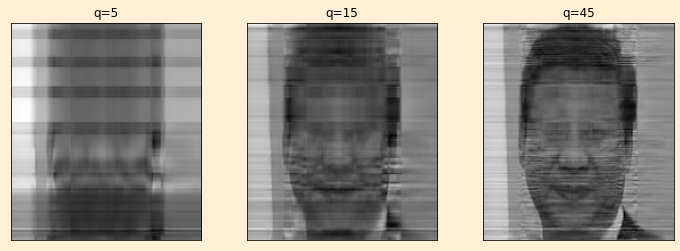

In [33]:
pic_to_pic(X5, X3)

     解密結果
- 利用風景照（$X_5$）的特徵U解密後呈現的影像不太清楚
- 解密後的影像都是上半部模糊下半部清晰，可能原因為風景照上半部為天空，下半部為主要提取特徵處所導致。
<hr>

### 結論
1. 以人臉加密的實驗中發現，解密後的影像存在原圖的模樣。
2. 原加密影像的特徵位置明顯影響解密後影像呈現的清晰位置。
3. 以簡單線條的影像作加密，解密後的效果不太好，以人臉或是特徵清晰的草莓圖片作加密效果較佳。
